In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import cifar10

Using TensorFlow backend.
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [3]:
cifar= cifar10.load_data()

170500096/170498071 [==============================] - 496s 3us/step


In [81]:
(X_train, y_train), (X_test, y_test) = cifar

In [82]:
X_train.shape

(50000, 32, 32, 3)

In [83]:
X_test.shape

(10000, 32, 32, 3)

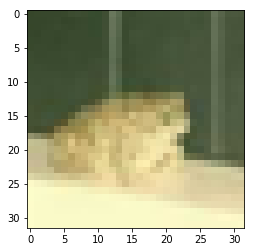

In [84]:
plt.imshow(X_train[350], cmap="gray")

In [85]:
y_train[588]

array([6], dtype=uint8)

In [86]:
# X_train = X_train.reshape(-1, 32*32)
# X_test = X_test.reshape(-1, 32*32)

In [87]:
# X_train[0]

In [88]:
d1, d2, d3, d4 = X_train.shape

In [89]:
X_train= X_train.reshape((d1, -1))

In [90]:
X_train.shape

(50000, 3072)

In [91]:
X_train.shape

(50000, 3072)

In [92]:
d1, d2, d3, d4 = X_test.shape
X_test= X_test.reshape((d1, -1))

In [93]:
X_test.shape

(10000, 3072)

In [94]:
X_train= X_train.astype("float32")
X_test= X_test.astype("float32")
X_train/=255.0 

In [95]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [96]:
X_train_reshaped.shape

(10000, 15360)

In [97]:
from keras.models import Sequential
from keras.layers import Dense

In [98]:
model = Sequential()

In [102]:
model.add(Dense(100, input_dim=32*32*3, activation='relu')) #we only need to specify inputs in first layer
model.add(Dense(200, activation='relu')) 
model.add(Dense(300, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(10, activation='softmax')) #it has to be softmax!
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [103]:
h=model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 9s 216us/step - loss: 1.6371 - acc: 0.4419 - val_loss: 1.6175 - val_acc: 0.4409
Epoch 2/10
40000/40000 [==============================] - 8s 200us/step - loss: 1.5041 - acc: 0.4769 - val_loss: 1.5930 - val_acc: 0.4396
Epoch 3/10
40000/40000 [==============================] - 8s 199us/step - loss: 1.4686 - acc: 0.4879 - val_loss: 1.7577 - val_acc: 0.4258
Epoch 4/10
40000/40000 [==============================] - 8s 203us/step - loss: 1.4454 - acc: 0.4995 - val_loss: 1.5552 - val_acc: 0.4644
Epoch 5/10
40000/40000 [==============================] - 8s 202us/step - loss: 1.4220 - acc: 0.5016 - val_loss: 1.6490 - val_acc: 0.4384
Epoch 6/10
40000/40000 [==============================] - 8s 200us/step - loss: 1.4077 - acc: 0.5052 - val_loss: 1.5858 - val_acc: 0.4556
Epoch 7/10
40000/40000 [==============================] - 8s 202us/step - loss: 1.3868 - acc: 0.5151 - val_loss: 1.6102 - 

In [104]:
test_accuracy = model.evaluate(X_test, y_test_cat)[1]
test_accuracy

10000/10000 [==============================] - 1s 87us/step


0.4277

In [ ]:
#CNN

In [105]:
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

In [106]:
from keras.layers import Flatten, Activation

In [108]:
from keras.layers import Conv2D, MaxPool2D

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), )) #32 is the number of features , 3*3 is filter size
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [109]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               921728    
_________________________________________________________________
dense_34 (Dense)             (None, 10)                1290      
Total params: 923,914
Trainable params: 923,914
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.fit(X_train, y_train_cat, batch_size=128,
         epochs=2, verbose=1, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/2
35000/35000 [==============================] - 19s 556us/step - loss: 1.7345 - acc: 0.3865 - val_loss: 1.5037 - val_acc: 0.4613
Epoch 2/2
35000/35000 [==============================] - 18s 524us/step - loss: 1.3960 - acc: 0.5100 - val_loss: 1.4086 - val_acc: 0.5065


In [111]:
model.evaluate(X_test, y_test_cat)

10000/10000 [==============================] - 2s 217us/step


[9.69505202331543, 0.3919]